In [1]:
import sys
import subprocess

In [2]:
print("Installing required libraries...")
print("This will take a few minutes. Please wait...\n")

Installing required libraries...
This will take a few minutes. Please wait...



In [3]:
libraries = [
    'tensorflow',
    'opencv-python',
    'kaggle',
    'seaborn',
    'scikit-learn'
]

In [4]:
for lib in libraries:
    print(f"Installing {lib}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", lib, "-q"])
    print(f"✅ {lib} installed!")

Installing tensorflow...
✅ tensorflow installed!
Installing opencv-python...
✅ opencv-python installed!
Installing kaggle...
✅ kaggle installed!
Installing seaborn...
✅ seaborn installed!
Installing scikit-learn...
✅ scikit-learn installed!


In [5]:
print("\n🎉 All libraries installed successfully!")
print("Now run the next cell to import and test them.")


🎉 All libraries installed successfully!
Now run the next cell to import and test them.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

C:\Users\aounm\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [8]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
print("=" * 70)
print("SKIN CANCER DETECTION PROJECT - WEEK 1")
print("=" * 70)
print("\n✅ All libraries imported successfully!\n")
print(f"Python version: {sys.version.split()[0]}")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"OpenCV version: {cv2.__version__}")

SKIN CANCER DETECTION PROJECT - WEEK 1

✅ All libraries imported successfully!

Python version: 3.13.5
TensorFlow version: 2.20.0
NumPy version: 2.1.3
Pandas version: 2.2.3
OpenCV version: 4.12.0


In [10]:
# Check if GPU is available (probably not on local, but let's check)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"🎮 GPU Available: {len(gpus)} GPU(s) detected")
else:
    print("💻 Running on CPU (this is fine for Week 1!)")

print("\n🚀 You're all set! Ready to download the dataset.")

💻 Running on CPU (this is fine for Week 1!)

🚀 You're all set! Ready to download the dataset.


In [12]:
# CELL 3: Find Kaggle Configuration Path
import os
from pathlib import Path


In [13]:
print("=" * 70)
print("KAGGLE API SETUP")
print("=" * 70)

KAGGLE API SETUP


In [14]:
# Determine the correct path based on OS
home_dir = str(Path.home())
kaggle_dir = os.path.join(home_dir, '.kaggle')

print(f"\n📍 Your Kaggle folder should be at:")
print(f"   {kaggle_dir}")


📍 Your Kaggle folder should be at:
   C:\Users\aounm\.kaggle


In [18]:
# Create .kaggle directory if it doesn't exist
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
    print(f"\n✅ Created .kaggle directory")
else:
    print(f"\n✅ .kaggle directory already exists")

print(f"\n📝 INSTRUCTIONS:")
print(f"1. Find your downloaded 'kaggle.json' file (probably in Downloads folder)")
print(f"2. Move/Copy 'kaggle.json' to this location:")
print(f"   {kaggle_dir}")
print(f"\n3. After moving the file, run the next cell to verify.")


✅ .kaggle directory already exists

📝 INSTRUCTIONS:
1. Find your downloaded 'kaggle.json' file (probably in Downloads folder)
2. Move/Copy 'kaggle.json' to this location:
   C:\Users\aounm\.kaggle

3. After moving the file, run the next cell to verify.


In [19]:
# On Windows, show the path in a more familiar format
if os.name == 'nt':  # Windows
    print(f"\n💡 On Windows, you can paste this in File Explorer:")
    print(f"   {kaggle_dir.replace('/', '\\')}")


💡 On Windows, you can paste this in File Explorer:
   C:\Users\aounm\.kaggle


In [30]:
# CELL 4: Verify Kaggle API Configuration
import os
from pathlib import Path
import json

home_dir = str(Path.home())
kaggle_dir = os.path.join(home_dir, '.kaggle')
kaggle_json = os.path.join(kaggle_dir, 'kaggle.json')

print("=" * 70)
print("VERIFYING KAGGLE SETUP")
print("=" * 70)

if os.path.exists(kaggle_json):
    print("\n✅ kaggle.json found!")
    try:
        with open(kaggle_json, 'r') as f:
            config = json.load(f)
        if 'username' in config and 'key' in config:
            print("✅ Configuration valid!")
            print(f"   Username: {config['username']}")
            hidden_key = '*' * 20
            print(f"   API Key: {hidden_key} (hidden for security)")
            if os.name != 'nt':
                os.chmod(kaggle_json, 0o600)
                print("✅ Permissions set correctly")
            print("\n🎉 Kaggle API is ready to use!")
            print("   You can now download the dataset.")
        else:
            print("❌ kaggle.json is missing username or key")
    except json.JSONDecodeError:
        print("❌ kaggle.json is not valid JSON format")
else:
    print(f"\n❌ kaggle.json NOT found at:")
    print(f"   {kaggle_json}")
    print(f"\n📝 Please place your kaggle.json file in:")
    print(f"   {kaggle_dir}")

VERIFYING KAGGLE SETUP

✅ kaggle.json found!
✅ Configuration valid!
   Username: aunmustansarhussain
   API Key: ******************** (hidden for security)

🎉 Kaggle API is ready to use!
   You can now download the dataset.


In [37]:
import kaggle
import zipfile

print("Downloading... please wait 3-5 minutes")

# Download
kaggle.api.dataset_download_files(
    'hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images',
    path='data',
    unzip=True
)

print("✅ Done!")

Downloading... please wait 3-5 minutes
Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
✅ Done!


In [38]:
import os

print("📁 What's in the data folder:")

for item in os.listdir('data'):
    print(f"  - {item}")
    
    # If it's a folder, check what's inside
    path = os.path.join('data', item)
    if os.path.isdir(path):
        files = os.listdir(path)
        print(f"    ({len(files)} items inside)")

📁 What's in the data folder:
  - melanoma_cancer_dataset
    (2 items inside)


In [39]:
import os

# Check inside the melanoma folder
path = 'data/melanoma_cancer_dataset'

print("📁 Inside melanoma_cancer_dataset:")
for item in os.listdir(path):
    print(f"  - {item}")
    
    # Check what's inside each subfolder
    subfolder = os.path.join(path, item)
    if os.path.isdir(subfolder):
        num_images = len(os.listdir(subfolder))
        print(f"    ({num_images} images)")

📁 Inside melanoma_cancer_dataset:
  - test
    (2 images)
  - train
    (2 images)


In [41]:
import os

# Check train
train = 'data/melanoma_cancer_dataset/train'
print("TRAIN:")
for item in os.listdir(train):
    count = len(os.listdir(os.path.join(train, item)))
    print(f"  {item}: {count} images")

# Check test
test = 'data/melanoma_cancer_dataset/test'
print("\nTEST:")
for item in os.listdir(test):
    count = len(os.listdir(os.path.join(test, item)))
    print(f"  {item}: {count} images")

TRAIN:
  benign: 5000 images
  malignant: 4605 images

TEST:
  benign: 500 images
  malignant: 500 images


Train: 5000 benign, 4605 malignant
Test: 500 benign, 500 malignant
Total: 10605


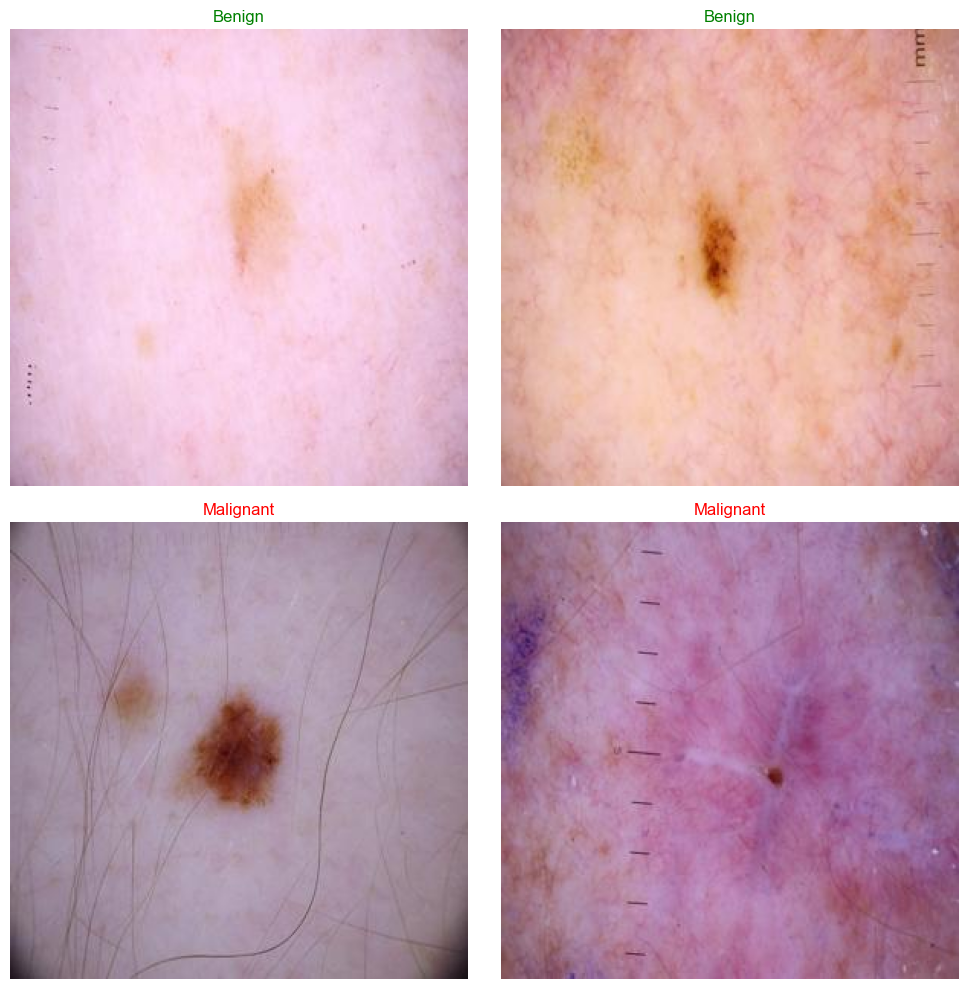

In [42]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Count images
train_b = len(os.listdir('data/melanoma_cancer_dataset/train/benign'))
train_m = len(os.listdir('data/melanoma_cancer_dataset/train/malignant'))
test_b = len(os.listdir('data/melanoma_cancer_dataset/test/benign'))
test_m = len(os.listdir('data/melanoma_cancer_dataset/test/malignant'))

print(f"Train: {train_b} benign, {train_m} malignant")
print(f"Test: {test_b} benign, {test_m} malignant")
print(f"Total: {train_b + train_m + test_b + test_m}")

# Show 4 images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 2 benign
benign_dir = 'data/melanoma_cancer_dataset/train/benign'
for i in range(2):
    img_name = random.choice(os.listdir(benign_dir))
    img = cv2.imread(os.path.join(benign_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0, i].imshow(img)
    axes[0, i].set_title("Benign", color='green')
    axes[0, i].axis('off')

# 2 malignant
malig_dir = 'data/melanoma_cancer_dataset/train/malignant'
for i in range(2):
    img_name = random.choice(os.listdir(malig_dir))
    img = cv2.imread(os.path.join(malig_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[1, i].imshow(img)
    axes[1, i].set_title("Malignant", color='red')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [43]:
import os
import shutil
import random

# Create validation folder
val_path = 'data/melanoma_cancer_dataset/val'
os.makedirs(val_path + '/benign', exist_ok=True)
os.makedirs(val_path + '/malignant', exist_ok=True)

train_path = 'data/melanoma_cancer_dataset/train'

# Move 15% of training images to validation
for class_name in ['benign', 'malignant']:
    train_class = os.path.join(train_path, class_name)
    val_class = os.path.join(val_path, class_name)
    
    images = os.listdir(train_class)
    val_count = int(len(images) * 0.15)
    val_images = random.sample(images, val_count)
    
    for img in val_images:
        shutil.move(os.path.join(train_class, img), 
                    os.path.join(val_class, img))
    
    print(f"{class_name}: moved {val_count} to validation")

print("\n✅ Validation set created!")
print("\nFinal split:")
print(f"Train: {len(os.listdir(train_path + '/benign')) + len(os.listdir(train_path + '/malignant'))}")
print(f"Val: {len(os.listdir(val_path + '/benign')) + len(os.listdir(val_path + '/malignant'))}")
print(f"Test: 1000")

benign: moved 750 to validation
malignant: moved 690 to validation

✅ Validation set created!

Final split:
Train: 8165
Val: 1440
Test: 1000
